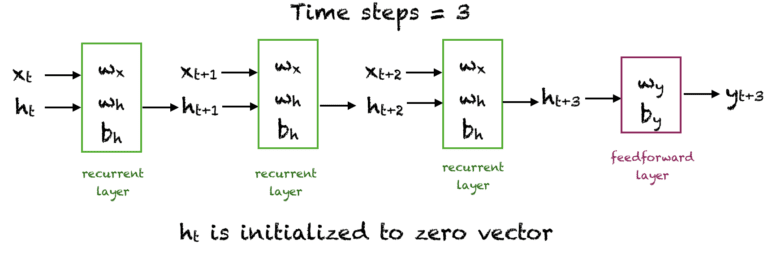

# Single Layer

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, SimpleRNN
import numpy as np

hidden_units = 2
input_shape = (3, 1)

# Define the input layer
input_layer = Input(shape=input_shape)
# First RNN layer
rnn_layer1 = SimpleRNN(hidden_units,return_sequences=True)(input_layer)
# Second RNN layer
#rnn_layer2 = SimpleRNN(hidden_units)(rnn_layer1)
# Dense layer
output_layer = Dense(1, activation='sigmoid')(rnn_layer1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (add optimizer and loss function as needed)
# model.compile(optimizer='adam', loss='binary_crossentropy')

# Print model summary
model.summary()

In [ ]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]


wy = model.get_weights()[3]
by = model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ',bh,' wy =', wy, 'by = ', by)

In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = model.predict(x_input)
print("Prediction from network\n ", y_pred_model)

In [ ]:
x_input[0, 0]
x_input[0, 1]
x_input[0, 2]

In [ ]:
# Initialize hidden states
m = 2
h = np.zeros((m))

# Compute the hidden states and output manually
outputs = []
for t in range(x_input.shape[1]):
    h = np.tanh(np.dot(x_input[0, t], wx) + np.dot(h, wh) + bh)
    o = 1 / (1 + np.exp(-(np.dot(h, wy) + by)))
    outputs.append(o)

outputs = np.array(outputs)
print("Prediction from manual computation: \n", outputs)

# Stacked RNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define a simple RNN model
hidden_units = 2
input_shape = (3, 1)

# Define the input layer
input_layer = Input(shape=input_shape)
# First RNN layer
rnn_layer1 = SimpleRNN(hidden_units,return_sequences=True)(input_layer)
# Second RNN layer
rnn_layer2 = SimpleRNN(hidden_units)(rnn_layer1)
# Dense layer
output_layer = Dense(1, activation='sigmoid')(rnn_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (add optimizer and loss function as needed)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

In [ ]:
# Define the input data
x = np.array([1, 2, 3])

# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x, (1, 3, 1))

# Make a prediction using the model
y_pred_model = model.predict(x_input)
print("Prediction from the neural network: \n", y_pred_model)

In [ ]:
# Get the weights from the model
wx = model.get_weights()[0]  # Weight matrix for input x
wh = model.get_weights()[1]  # Weight matrix for hidden state h
bh = model.get_weights()[2]  # Bias for hidden state h

wx1 = model.get_weights()[3]
wh1 = model.get_weights()[4]
bh1 = model.get_weights()[5] 

wy = model.get_weights()[6] # Weight matrix for output y
by = model.get_weights()[7]  # # Bias for output y

In [ ]:
# Initialize hidden states
m = 2
h = np.zeros((m))

# Compute the hidden states and output manually 
rnn_layer1_outputs = []
# FOr return_sequence=True
for t in range(x_input.shape[1]):
    h = np.tanh(np.dot(x_input[0, t], wx) + np.dot(h, wh) + bh)
    rnn_layer1_outputs.append(h)
rnn_layer1_outputs = np.array(rnn_layer1_outputs)
print('First RNN layer output\n',rnn_layer1_outputs) 

In [ ]:
h30 = np.zeros(2)
h31 = np.tanh(np.dot(rnn_layer1_outputs[0], wx1) +h30 + bh1)
h32 = np.tanh(np.dot(rnn_layer1_outputs[1] , wx1) + np.dot(h31,wh1) + bh1)
h33 = np.tanh(np.dot(rnn_layer1_outputs[2] , wx1) + np.dot(h32,wh1) + bh1)
outputs = 1/(1 +np.exp(-(np.dot(h33, wy) + by)))

outputs = np.array(outputs)
print("Prediction from manual computation: \n", outputs)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define a simple RNN model
hidden_units = 2
input_shape = (3, 1)

# Define the input layer
input_layer = Input(shape=input_shape)
# First RNN layer
rnn_layer1 = SimpleRNN(hidden_units,return_sequences=True)(input_layer)
# Second RNN layer
rnn_layer2 = SimpleRNN(hidden_units)(rnn_layer1)
# Dense layer
output_layer = Dense(1, activation='sigmoid')(rnn_layer2)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (add optimizer and loss function as needed)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()
# Define the input data
x = np.array([1, 2, 3])

# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x, (1, 3, 1))

# Make a prediction using the model
y_pred_model = model.predict(x_input)
print("Prediction from the neural network: \n", y_pred_model)

# Get the weights from the model
wx = model.get_weights()[0]  # Weight matrix for input x
wh = model.get_weights()[1]  # Weight matrix for hidden state h
bh = model.get_weights()[2]  # Bias for hidden state h

wx1 = model.get_weights()[3]
wh1 = model.get_weights()[4]
bh1 = model.get_weights()[5] 

wy = model.get_weights()[6] # Weight matrix for output y
by = model.get_weights()[7]  # # Bias for output y

# Initialize hidden states
m = 2
h = np.zeros((m))

# Compute the hidden states and output manually
rnn_layer1_outputs = []
for t in range(x_input.shape[1]):
    h = np.tanh(np.dot(x_input[0, t], wx) + np.dot(h, wh) + bh)
    #o = 1 / (1 + np.exp(-(np.dot(h, wy) + by)))
    rnn_layer1_outputs.append(h)
rnn_layer1_outputs = np.array(rnn_layer1_outputs)
print(rnn_layer1_outputs)   
h30 = np.zeros(2)
h31 = np.tanh(np.dot(rnn_layer1_outputs[0], wx1) +h30 + bh1)
h32 = np.tanh(np.dot(rnn_layer1_outputs[1] , wx1) + np.dot(h31,wh1) + bh1)
h33 = np.tanh(np.dot(rnn_layer1_outputs[2] , wx1) + np.dot(h32,wh1) + bh1)
outputs = 1/(1 +np.exp(-(np.dot(h33, wy) + by)))

outputs = np.array(outputs)
print("Prediction from manual computation: \n", outputs)